<a href="https://colab.research.google.com/github/ANKIT3046/datascience_mlproject/blob/master/stock_price__prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [0]:
dataset_train=pd.read_csv('Google_Stock_Price_Train.csv')
training_set=dataset_train.iloc[:,1:2].values

In [0]:
#feature scaling
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler(feature_range=(0,1))
training_set_scaled=sc.fit_transform(training_set)

In [0]:
#creating a data structure with 60 timestps and 1 output
X_train=[]
y_train=[]
for i in range(60,1258):
    X_train.append(training_set_scaled[i-60:i,0])
    y_train.append(training_set_scaled[i,0])
X_train,y_train=np.array(X_train),np.array(y_train)


In [0]:
#reshaping
X_train=np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))

In [0]:
#Building the RNN
#importing the keras libraries and packages


In [0]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout


In [0]:
# initialising the RNN
regressor=Sequential()


In [0]:
#Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units=50,return_sequences=True,input_shape=(X_train.shape[1],1)))
regressor.add(Dropout(0.2))




Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [0]:
# add second LSTM
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))
# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))
# Adding the output layer
regressor.add(Dense(units = 1))

In [0]:
# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [0]:
# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Epoch 1/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0515
Epoch 2/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0052
Epoch 3/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0043
Epoch 4/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0044
Epoch 5/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0036
Epoch 6/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0041
Epoch 7/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0038
Epoch 8/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0044
Epoch 9/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0037
Epoch 10/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0034
Epoch 11/100
1198/1198 [==============================] - 5s 4ms

In [0]:
#making the predictions and visualising the result
#Getting the real stock price of 2017
dataset_test=pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price=dataset_test.iloc[:,1:2].values

In [0]:
#Gettting the predicted price of 2017
dataset_total=pd.concat((dataset_train['Open'],dataset_test['Open']),axis=0)
inputs=dataset_total[len(dataset_total) - len(dataset_test) -60:].values
inputs=inputs.reshape(-1,1)
inputs=sc.transform(inputs)
X_test=[]
for i in range(60,80):
    X_test.append(inputs[i-60:i,0])
X_test=np.array(X_test)
X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
predicted_stock_price=regressor.predict(X_test)
predicted_stock_price=sc.inverse_transform(predicted_stock_price)

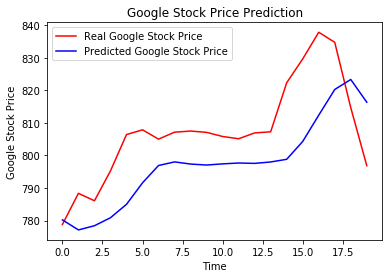

In [0]:
# Visualising the results
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()